![image](https://1.bp.blogspot.com/-w22Iw7BRZsg/XzWx-S7DtpI/AAAAAAAAGZg/zgpN2e5Oye8qPXfq0zLq6dm38afXaUa8gCLcBGAsYHQ/s1999/image4%2B%25281%2529.jpg)

BlazePose is a novel convolutional neural network architecture for human pose estimation that can run in real-time on mobile devices. It can detect 33 body keypoints, including face, hands, and feet, which are useful for applications like fitness, dance, and gesture control. BlazePose is based on a two-step detector-tracker pipeline that first locates the pose region-of-interest and then predicts the keypoints from it. BlazePose outperforms existing pose models in terms of accuracy, speed, and memory. BlazePose can also provide clinically viable body keypoints for virtual motion assessment.


[
https://arxiv.org/abs/2006.10204
](https://)



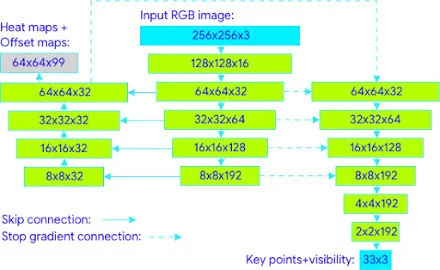

#Installations and dependensies

In [1]:
#@title Mediapipe instalation
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 46.8 MB/s eta 0:00:00


## Download tools from github:

In [2]:
user = "ItayCoifman"
repo = "blazepose-mediapipe-example"
src_dir = "tools"
pyfile = "video.py"
url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url};
pyfile = "visualize.py"
url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url};
pyfile = "utils.py"
url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url};

--2024-11-24 18:10:02--  https://raw.githubusercontent.com/ItayCoifman/blazepose-mediapipe-example/main/tools/video.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7213 (7.0K) [text/plain]
Failed to rename video.py to video.py.1: (2) No such file or directory
Saving to: ‘video.py’

video.py            100%[===================>]   7.04K  --.-KB/s    in 0s      

2024-11-24 18:10:02 (67.3 MB/s) - ‘video.py’ saved [7213/7213]

--2024-11-24 18:10:02--  https://raw.githubusercontent.com/ItayCoifman/blazepose-mediapipe-example/main/tools/visualize.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 

## Imports

In [ ]:
# from tools import video,utils,visualize

In [3]:
from video import Video
import visualize
from utils import landmarks_2_table
import mediapipe as mp
import os
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm

## Functions

In [4]:
def video_pose_estimation(video_path: str, output_path = None, verbose=True):
    """
    Apply a pose estimation model to each frame of a video and return a processed video and the output from the model for each frame.

    Args:
    video_path (str): File path of the video to be processed.
    output_path (str, optional): File path of the output video. Default is None.
    verbose (bool, optional): Boolean indicating whether to print progress updates. Default is True.

    Returns:
    vid (Video): Processed video object.
    marker_df (DataFrame): DataFrame containing the x, y, and z coordinates of each landmark for each frame of the processed video.
    visibility_df (DataFrame): DataFrame containing the visibility score for each landmark for each frame of the processed video.
    """
    output = []
    timestamps =[]
    # Todo add option to input video:
    vid = Video.from_path(video_path)
    video_name = os.path.basename(video_path)
    #init video writer and reader
    vid_cap = cv2.VideoCapture(vid.path)
    video_writer = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*"mp4v"), vid.fps, (vid.width, vid.height))
    if verbose:
        print(f"Processing- {vid} \n")

    # Initialize the pose estimation model
    with mp.solutions.pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        for frame_index in tqdm(range(vid.nFrames)):
            success, img = vid_cap.read()
            if not success:
                break
            # Convert BGR to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Get the timestamp of the current frame
            timestamps.append(vid_cap.get(cv2.CAP_PROP_POS_MSEC))
            # Run the model
            results = pose.process(img)
            output.append(results)
            # Draw the pose annotation on the image.
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            mp.solutions.drawing_utils.draw_landmarks(
                img,
                results.pose_landmarks,
                mp.solutions.pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp.solutions.drawing_styles.get_default_pose_landmarks_style()
                )
                    # Write the frame to the output video
            video_writer.write(img)
    # close video
    video_writer.release()
    cv2.destroyAllWindows()
    # Return the processed video and the model outputs
    try:
      marker_df,visibility_df = landmarks_2_table(output,time_vec = np.array(timestamps)/1000)
    except:
      marker_df,visibility_df = output,[]
      print("plese replace the video")
    return Video.from_path(output_path), marker_df, visibility_df



# BlazePose Mediapipe - Extract Pose Estimation From Video:

## Upload your video

In [5]:
from google.colab import files
uploaded = files.upload()
for file_name in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=file_name, length=len(uploaded[file_name])))

Saving bebekler.mp4 to bebekler.mp4
User uploaded file "bebekler.mp4" with length 2573011 bytes


## Estimate pose

In [ ]:
output_path = "proc.mp4"
vid, marker_df,visibility_df  = video_pose_estimation(video_path = file_name,output_path =output_path)

Processing- Name- bebekler.mp4:
 Width- 640, Height- 360 
 number of frames- 834, Fps- 25.0 
 Path-bebekler.mp4 



 45%|████▍     | 375/834 [00:24<00:23, 19.57it/s]

## Veiw your results
Notice- Convert funciton is only used for presenting Video in google Colab

In [ ]:
vid.convert()
vid.play(frac = 0.75) #change frac acording to the video width and height

Converted to colab freiendly format


In [ ]:
marker_df.head()

,t,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,left_eye_z,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,0.000000,-0.040023,1.403189,-0.417905,-0.064516,1.430773,-0.404323,-0.063697,1.431230,-0.404206,...,-0.098742,0.216740,0.237576,-0.116070,-0.252067,0.165444,-0.240517,0.219579,0.194140,-0.237905
1,0.041708,-0.040448,1.397682,-0.420682,-0.064764,1.425838,-0.406940,-0.063941,1.426316,-0.406809,...,-0.102840,0.216240,0.254071,-0.116146,-0.255087,0.182407,-0.241879,0.218510,0.215541,-0.237887
2,0.083417,-0.041648,1.389697,-0.424033,-0.065770,1.418011,-0.411699,-0.064949,1.418499,-0.411551,...,-0.106676,0.216186,0.274821,-0.117333,-0.254211,0.200086,-0.244467,0.218484,0.239489,-0.238576
3,0.125125,-0.041654,1.383305,-0.428629,-0.065789,1.411958,-0.416885,-0.064968,1.412422,-0.416724,...,-0.112738,0.215702,0.297261,-0.117407,-0.223933,0.217586,-0.250519,0.218289,0.264073,-0.237903
4,0.166833,-0.041427,1.379254,-0.432554,-0.065656,1.407819,-0.420440,-0.064830,1.408267,-0.420282,...,-0.119622,0.214092,0.307364,-0.121566,-0.198192,0.226288,-0.257161,0.216479,0.274216,-0.239432


In [ ]:
visibility_df.head()

,t,nose,left_eye_inner,left_eye,left_eye_outer,right_eye_inner,right_eye,right_eye_outer,left_ear,right_ear,...,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle,left_heel,right_heel,left_foot_index,right_foot_index
0,0.000000,0.999996,0.999998,0.999998,0.999999,0.999998,0.999998,0.999998,0.999997,0.999998,...,0.999965,0.999928,0.992421,0.540179,0.993929,0.674594,0.990424,0.758872,0.992723,0.797903
1,0.041708,0.999996,0.999998,0.999998,0.999999,0.999998,0.999998,0.999998,0.999997,0.999998,...,0.999966,0.999930,0.992177,0.535764,0.993831,0.673118,0.990497,0.759662,0.992620,0.796413
2,0.083417,0.999997,0.999998,0.999998,0.999999,0.999998,0.999998,0.999998,0.999997,0.999998,...,0.999966,0.999930,0.991910,0.529899,0.993713,0.671072,0.990523,0.760386,0.992476,0.794744
3,0.125125,0.999997,0.999998,0.999998,0.999999,0.999998,0.999998,0.999998,0.999997,0.999998,...,0.999965,0.999930,0.991589,0.524718,0.993516,0.669645,0.990497,0.761266,0.992206,0.792978
4,0.166833,0.999996,0.999998,0.999998,0.999999,0.999998,0.999998,0.999998,0.999997,0.999998,...,0.999964,0.999930,0.991256,0.516671,0.993305,0.666560,0.990435,0.760300,0.991925,0.789963


## Export and download Results:

In [ ]:
download_markers = True #@param ["False", "True"] {type:"raw"}
if download_markers:
  markers_file = 'markers.csv'
  marker_df.to_csv(markers_file)
  files.download(markers_file)

In [ ]:
download_visability = True #@param ["False", "True"] {type:"raw"}
if download_visability:
  visibility_file = 'visibility.csv'
  visibility_df.to_csv(visibility_file)
  files.download(visibility_file)

In [ ]:
download_video = True #@param ["False", "True"] {type:"raw"}
if download_video:
  files.download(vid.path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# visualizae the data